# 📊 Análisis Exploratorio de Tipo de Cambio en Perú

---

## Información del Proyecto

| Campo | Valor |
|-------|-------|
| **Proyecto** | TipoCambio.pe |
| **Curso** | Lenguaje de Programación 2 (LP2) |
| **Institución** | Universidad Nacional Agraria La Molina (UNALM) |
| **Semestre** | 2025-2 |
| **Fecha** | Diciembre 2025 |

## Equipo de Trabajo

| Integrante | GitHub | Rol |
|------------|--------|-----|
| Javier Uraco | @JavierAnthonyUS | Líder, BCRP, Rextie, Integrador, Análisis |
| Fiorella Fuentes | @fiorellafuentesb20-cell | Scraper Kambista |
| Sebastián Fernández | @TucoSquare | Documentación |

---

## Objetivo del Análisis

Este notebook realiza un análisis exploratorio completo de los datos de tipo de cambio extraídos de **3 fuentes diferentes**:

1. **BCRP** - Banco Central de Reserva del Perú (API oficial)
2. **Kambista** - Casa de cambio digital (Web Scraping con Selenium)
3. **Rextie** - Casa de cambio digital (Web Scraping con Selenium)

### Preguntas a responder:

- ¿Cuál es la mejor fuente para **comprar** dólares?
- ¿Cuál es la mejor fuente para **vender** dólares?
- ¿Cuál fuente tiene el **menor spread** (mejor para el usuario)?
- ¿Cuánto dinero se puede **ahorrar** eligiendo la mejor fuente?

---

## 1. Configuración del Entorno

Importamos las librerías necesarias y configuramos el estilo de los gráficos.

In [9]:
# =============================================================================
# IMPORTACIÓN DE LIBRERÍAS
# =============================================================================

# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Utilidades
import os
from datetime import datetime
import warnings

# Configuración
warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURACIÓN DE VISUALIZACIÓN
# =============================================================================

# Estilo de gráficos
plt.style.use('seaborn-v0_8-whitegrid')

# Parámetros globales de matplotlib
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

# Paleta de colores personalizada
COLORES = {
    'bcrp': '#2E86AB',      # Azul institucional
    'kambista': '#A23B72',  # Magenta
    'rextie': '#F18F01',    # Naranja
    'compra': '#2ECC71',    # Verde
    'venta': '#E74C3C',     # Rojo
    'spread': '#9B59B6',    # Púrpura
    'ahorro': '#1ABC9C'     # Turquesa
}

print("✅ Librerías importadas correctamente")
print(f"📅 Fecha de análisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"🐍 Versión de Pandas: {pd.__version__}")

✅ Librerías importadas correctamente
📅 Fecha de análisis: 2025-12-22 14:09:25
🐍 Versión de Pandas: 2.3.3


---

## 2. Carga de Datos

Cargamos el archivo CSV con los datos históricos de tipo de cambio.

In [10]:
# =============================================================================
# CARGA DEL DATASET
# =============================================================================

# Ruta del archivo CSV
RUTA_CSV = '../data/processed/tipo_cambio_historico.csv'

# Verificar que el archivo existe
if os.path.exists(RUTA_CSV):
    print(f"✅ Archivo encontrado: {RUTA_CSV}")
else:
    print(f"❌ Archivo no encontrado: {RUTA_CSV}")
    print("   Ejecute primero: python src/integrador.py")

# Cargar datos
df = pd.read_csv(RUTA_CSV)

# Convertir timestamp a datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Información básica
print(f"\n📊 INFORMACIÓN DEL DATASET")
print(f"{'='*50}")
print(f"   Registros totales: {len(df)}")
print(f"   Columnas: {len(df.columns)}")
print(f"   Rango de fechas: {df['timestamp'].min()} a {df['timestamp'].max()}")
print(f"{'='*50}")

✅ Archivo encontrado: ../data/processed/tipo_cambio_historico.csv

📊 INFORMACIÓN DEL DATASET
   Registros totales: 5
   Columnas: 13
   Rango de fechas: 2025-12-13 10:00:00 a 2025-12-21 22:19:22


In [11]:
# =============================================================================
# EXPLORACIÓN INICIAL DEL DATASET
# =============================================================================

print("📋 ESTRUCTURA DEL DATASET")
print("="*60)
print(f"\nColumnas disponibles ({len(df.columns)} total):")
print("-"*60)

for i, col in enumerate(df.columns, 1):
    tipo = df[col].dtype
    nulos = df[col].isnull().sum()
    print(f"  {i:2d}. {col:<25} | Tipo: {str(tipo):<10} | Nulos: {nulos}")

print("\n" + "="*60)

📋 ESTRUCTURA DEL DATASET

Columnas disponibles (13 total):
------------------------------------------------------------
   1. timestamp                 | Tipo: datetime64[ns] | Nulos: 0
   2. tc_bcrp_compra            | Tipo: float64    | Nulos: 0
   3. tc_bcrp_venta             | Tipo: float64    | Nulos: 0
   4. tc_kambista_compra        | Tipo: float64    | Nulos: 0
   5. tc_kambista_venta         | Tipo: float64    | Nulos: 0
   6. tc_rextie_compra          | Tipo: float64    | Nulos: 0
   7. tc_rextie_venta           | Tipo: float64    | Nulos: 0
   8. spread_bcrp               | Tipo: float64    | Nulos: 0
   9. spread_kambista           | Tipo: float64    | Nulos: 0
  10. spread_rextie             | Tipo: float64    | Nulos: 0
  11. mejor_compra              | Tipo: object     | Nulos: 0
  12. mejor_venta               | Tipo: object     | Nulos: 0
  13. cambio_detectado          | Tipo: bool       | Nulos: 0



In [12]:
# =============================================================================
# VISTA PREVIA DE LOS DATOS
# =============================================================================

print("🔍 PRIMEROS REGISTROS DEL DATASET")
print("="*80)
df.head()

🔍 PRIMEROS REGISTROS DEL DATASET


,timestamp,tc_bcrp_compra,tc_bcrp_venta,tc_kambista_compra,tc_kambista_venta,tc_rextie_compra,tc_rextie_venta,spread_bcrp,spread_kambista,spread_rextie,mejor_compra,mejor_venta,cambio_detectado
0,2025-12-13 10:00:00,3.7200,3.760,3.735,3.755,3.730,3.750,0.0400,0.020,0.020,Rextie,Kambista,True
1,2025-12-13 11:00:00,3.7200,3.760,3.736,3.756,3.731,3.751,0.0400,0.020,0.020,Rextie,Kambista,True
2,2025-12-13 12:00:00,3.7200,3.760,3.736,3.756,3.731,3.751,0.0400,0.020,0.020,Rextie,Kambista,False
3,2025-12-21 13:49:19,3.3666,3.363,3.330,3.486,3.351,3.391,-0.0036,0.156,0.040,BCRP,BCRP,True
4,2025-12-21 22:19:22,3.3666,3.363,3.330,3.486,3.350,3.392,-0.0036,0.156,0.042,BCRP,BCRP,True


---

## 3. Análisis Descriptivo

Calculamos estadísticas descriptivas de los tipos de cambio.

In [13]:
# =============================================================================
# ESTADÍSTICAS DESCRIPTIVAS
# =============================================================================

# Seleccionar columnas numéricas de tipo de cambio
columnas_tc = ['tc_bcrp_compra', 'tc_bcrp_venta', 
               'tc_kambista_compra', 'tc_kambista_venta',
               'tc_rextie_compra', 'tc_rextie_venta']

# Filtrar columnas que existen en el dataframe
columnas_tc = [col for col in columnas_tc if col in df.columns]

print("📈 ESTADÍSTICAS DESCRIPTIVAS DE TIPOS DE CAMBIO")
print("="*70)

# Calcular estadísticas
estadisticas = df[columnas_tc].describe().T
estadisticas['rango'] = estadisticas['max'] - estadisticas['min']

# Mostrar con formato
estadisticas.round(4)

📈 ESTADÍSTICAS DESCRIPTIVAS DE TIPOS DE CAMBIO


,count,mean,std,min,25%,50%,75%,max,rango
tc_bcrp_compra,5.0,3.5786,0.1936,3.3666,3.3666,3.720,3.720,3.720,0.3534
tc_bcrp_venta,5.0,3.6012,0.2174,3.3630,3.3630,3.760,3.760,3.760,0.3970
tc_kambista_compra,5.0,3.5734,0.2222,3.3300,3.3300,3.735,3.736,3.736,0.4060
tc_kambista_venta,5.0,3.6478,0.1477,3.4860,3.4860,3.755,3.756,3.756,0.2700
tc_rextie_compra,5.0,3.5786,0.2082,3.3500,3.3510,3.730,3.731,3.731,0.3810
tc_rextie_venta,5.0,3.6070,0.1967,3.3910,3.3920,3.750,3.751,3.751,0.3600


In [14]:
# =============================================================================
# ANÁLISIS DEL ÚLTIMO REGISTRO (DATOS MÁS RECIENTES)
# =============================================================================

# Obtener el registro más reciente
ultimo = df.iloc[-1]

print("\n" + "="*60)
print("   📊 DATOS MÁS RECIENTES")
print("="*60)
print(f"\n   🕐 Timestamp: {ultimo['timestamp']}")
print("\n   💱 TIPOS DE CAMBIO POR FUENTE:")
print("   " + "-"*50)

# BCRP
print(f"\n   🏛️  BCRP (Banco Central):")
print(f"       Compra: S/ {ultimo['tc_bcrp_compra']:.4f}")
print(f"       Venta:  S/ {ultimo['tc_bcrp_venta']:.4f}")

# Kambista
print(f"\n   💳 KAMBISTA:")
print(f"       Compra: S/ {ultimo['tc_kambista_compra']:.4f}")
print(f"       Venta:  S/ {ultimo['tc_kambista_venta']:.4f}")

# Rextie
print(f"\n   🌐 REXTIE:")
print(f"       Compra: S/ {ultimo['tc_rextie_compra']:.4f}")
print(f"       Venta:  S/ {ultimo['tc_rextie_venta']:.4f}")

print("\n" + "="*60)


   📊 DATOS MÁS RECIENTES

   🕐 Timestamp: 2025-12-21 22:19:22

   💱 TIPOS DE CAMBIO POR FUENTE:
   --------------------------------------------------

   🏛️  BCRP (Banco Central):
       Compra: S/ 3.3666
       Venta:  S/ 3.3630

   💳 KAMBISTA:
       Compra: S/ 3.3300
       Venta:  S/ 3.4860

   🌐 REXTIE:
       Compra: S/ 3.3500
       Venta:  S/ 3.3920



---

## 4. Visualización: Comparación de Tipos de Cambio

Gráfico comparativo de las tasas de compra y venta por fuente.

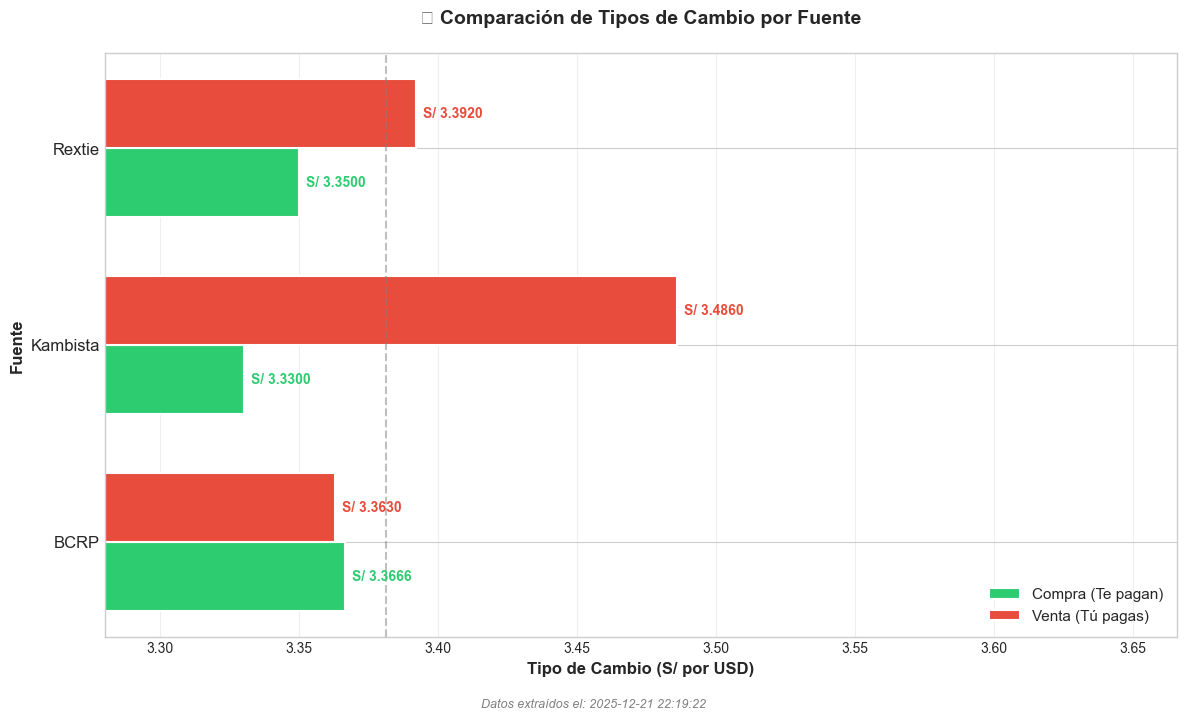


💡 INTERPRETACIÓN:
   • Compra (verde): Lo que la casa de cambio TE PAGA por tus dólares
   • Venta (rojo): Lo que TÚ PAGAS para comprar dólares


In [15]:
# =============================================================================
# GRÁFICO 1: COMPARACIÓN DE TIPOS DE CAMBIO POR FUENTE
# =============================================================================

# Datos del último registro
ultimo = df.iloc[-1]

# Preparar datos
fuentes = ['BCRP', 'Kambista', 'Rextie']
compra = [ultimo['tc_bcrp_compra'], ultimo['tc_kambista_compra'], ultimo['tc_rextie_compra']]
venta = [ultimo['tc_bcrp_venta'], ultimo['tc_kambista_venta'], ultimo['tc_rextie_venta']]

# Crear figura
fig, ax = plt.subplots(figsize=(12, 7))

# Posiciones y ancho de barras
y = np.arange(len(fuentes))
height = 0.35

# Crear barras horizontales
bars1 = ax.barh(y - height/2, compra, height, label='Compra (Te pagan)', 
                color=COLORES['compra'], edgecolor='white', linewidth=1.5)
bars2 = ax.barh(y + height/2, venta, height, label='Venta (Tú pagas)', 
                color=COLORES['venta'], edgecolor='white', linewidth=1.5)

# Configurar ejes
ax.set_xlabel('Tipo de Cambio (S/ por USD)', fontweight='bold')
ax.set_ylabel('Fuente', fontweight='bold')
ax.set_title('📊 Comparación de Tipos de Cambio por Fuente\n', fontsize=14, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(fuentes, fontsize=12)
ax.legend(loc='lower right', fontsize=11)

# Ajustar límites del eje X para mejor visualización
all_values = compra + venta
ax.set_xlim(min(all_values) - 0.05, max(all_values) + 0.18)

# Agregar valores en las barras
for bar in bars1:
    width = bar.get_width()
    ax.annotate(f'S/ {width:.4f}', 
                xy=(width, bar.get_y() + bar.get_height()/2),
                xytext=(5, 0), textcoords="offset points",
                ha='left', va='center', fontsize=10, fontweight='bold',
                color=COLORES['compra'])

for bar in bars2:
    width = bar.get_width()
    ax.annotate(f'S/ {width:.4f}', 
                xy=(width, bar.get_y() + bar.get_height()/2),
                xytext=(5, 0), textcoords="offset points",
                ha='left', va='center', fontsize=10, fontweight='bold',
                color=COLORES['venta'])

# Agregar línea de referencia (promedio)
promedio_general = np.mean(all_values)
ax.axvline(x=promedio_general, color='gray', linestyle='--', alpha=0.5, label=f'Promedio: {promedio_general:.4f}')

# Agregar grid
ax.grid(axis='x', alpha=0.3)

# Nota al pie
fig.text(0.5, -0.02, f'Datos extraídos el: {ultimo["timestamp"]}', 
         ha='center', fontsize=9, style='italic', color='gray')

plt.tight_layout()
plt.show()

print("\n💡 INTERPRETACIÓN:")
print("   • Compra (verde): Lo que la casa de cambio TE PAGA por tus dólares")
print("   • Venta (rojo): Lo que TÚ PAGAS para comprar dólares")

---

## 5. Análisis de Spreads

El **spread** es la diferencia entre el precio de venta y compra. Representa la ganancia de la casa de cambio.

**Menor spread = Mejor para el usuario**

In [16]:
# =============================================================================
# CÁLCULO Y ANÁLISIS DE SPREADS
# =============================================================================

# Calcular spreads del último registro
spread_bcrp = ultimo['tc_bcrp_venta'] - ultimo['tc_bcrp_compra']
spread_kambista = ultimo['tc_kambista_venta'] - ultimo['tc_kambista_compra']
spread_rextie = ultimo['tc_rextie_venta'] - ultimo['tc_rextie_compra']

spreads = {
    'BCRP': spread_bcrp,
    'Kambista': spread_kambista,
    'Rextie': spread_rextie
}

print("📊 ANÁLISIS DE SPREADS")
print("="*60)
print("\nEl spread es la diferencia entre el precio de venta y compra.")
print("Representa la ganancia de la casa de cambio.")
print("\n" + "-"*60)

for fuente, spread in spreads.items():
    emoji = "🟢" if spread == min(spreads.values()) else "🔴" if spread == max(spreads.values()) else "🟡"
    print(f"   {emoji} {fuente:12s}: S/ {spread:.4f}")

print("\n" + "-"*60)

# Identificar mejor y peor
mejor_spread = min(spreads.items(), key=lambda x: x[1] if x[1] > 0 else float('inf'))
peor_spread = max(spreads.items(), key=lambda x: x[1])

print(f"\n   🏆 MEJOR SPREAD (menor): {mejor_spread[0]} (S/ {mejor_spread[1]:.4f})")
print(f"   ⚠️  PEOR SPREAD (mayor): {peor_spread[0]} (S/ {peor_spread[1]:.4f})")

# Nota sobre BCRP
if spread_bcrp < 0:
    print("\n   ℹ️  NOTA: El BCRP muestra spread negativo porque sus tasas son")
    print("       valores de referencia del mercado interbancario, no precios")
    print("       para el público general.")

📊 ANÁLISIS DE SPREADS

El spread es la diferencia entre el precio de venta y compra.
Representa la ganancia de la casa de cambio.

------------------------------------------------------------
   🟢 BCRP        : S/ -0.0036
   🔴 Kambista    : S/ 0.1560
   🟡 Rextie      : S/ 0.0420

------------------------------------------------------------

   🏆 MEJOR SPREAD (menor): Rextie (S/ 0.0420)
   ⚠️  PEOR SPREAD (mayor): Kambista (S/ 0.1560)

   ℹ️  NOTA: El BCRP muestra spread negativo porque sus tasas son
       valores de referencia del mercado interbancario, no precios
       para el público general.


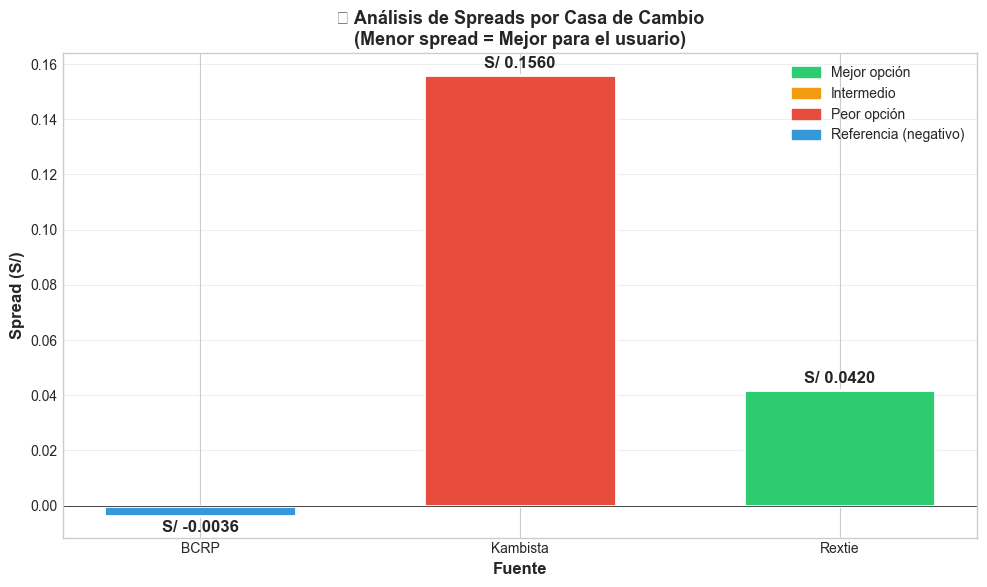

In [17]:
# =============================================================================
# GRÁFICO 2: COMPARACIÓN DE SPREADS
# =============================================================================

fig, ax = plt.subplots(figsize=(10, 6))

# Datos
fuentes_spread = list(spreads.keys())
valores_spread = list(spreads.values())

# Colores según el valor (verde=mejor, rojo=peor)
colores_spread = []
for s in valores_spread:
    if s < 0:
        colores_spread.append('#3498DB')  # Azul para negativo
    elif s == min([x for x in valores_spread if x > 0]):
        colores_spread.append('#2ECC71')  # Verde para mejor
    elif s == max(valores_spread):
        colores_spread.append('#E74C3C')  # Rojo para peor
    else:
        colores_spread.append('#F39C12')  # Amarillo para intermedio

# Crear barras
bars = ax.bar(fuentes_spread, valores_spread, color=colores_spread, 
              edgecolor='white', linewidth=2, width=0.6)

# Configuración
ax.set_xlabel('Fuente', fontweight='bold')
ax.set_ylabel('Spread (S/)', fontweight='bold')
ax.set_title('💰 Análisis de Spreads por Casa de Cambio\n(Menor spread = Mejor para el usuario)', 
             fontsize=13, fontweight='bold')

# Línea en cero
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Agregar valores en las barras
for bar, valor in zip(bars, valores_spread):
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    offset = 3 if height >= 0 else -3
    ax.annotate(f'S/ {valor:.4f}', 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, offset), textcoords="offset points",
                ha='center', va=va, fontsize=12, fontweight='bold')

# Leyenda personalizada
legend_elements = [
    mpatches.Patch(color='#2ECC71', label='Mejor opción'),
    mpatches.Patch(color='#F39C12', label='Intermedio'),
    mpatches.Patch(color='#E74C3C', label='Peor opción'),
    mpatches.Patch(color='#3498DB', label='Referencia (negativo)')
]
ax.legend(handles=legend_elements, loc='upper right')

ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---

## 6. Análisis de Mejor Opción

Determinamos cuál es la mejor fuente para:
- **COMPRAR dólares** (buscar menor precio de venta)
- **VENDER dólares** (buscar mayor precio de compra)

In [18]:
# =============================================================================
# DETERMINACIÓN DE MEJOR OPCIÓN
# =============================================================================

# Tasas de venta (para comprar USD)
tasas_venta = {
    'BCRP': ultimo['tc_bcrp_venta'],
    'Kambista': ultimo['tc_kambista_venta'],
    'Rextie': ultimo['tc_rextie_venta']
}

# Tasas de compra (para vender USD)
tasas_compra = {
    'BCRP': ultimo['tc_bcrp_compra'],
    'Kambista': ultimo['tc_kambista_compra'],
    'Rextie': ultimo['tc_rextie_compra']
}

# Encontrar mejores opciones
mejor_para_comprar = min(tasas_venta.items(), key=lambda x: x[1])
mejor_para_vender = max(tasas_compra.items(), key=lambda x: x[1])

peor_para_comprar = max(tasas_venta.items(), key=lambda x: x[1])
peor_para_vender = min(tasas_compra.items(), key=lambda x: x[1])

print("\n" + "="*65)
print("   🏆 RECOMENDACIONES DE MEJOR OPCIÓN")
print("="*65)

print("\n   📥 PARA COMPRAR DÓLARES (necesitas pagar soles):")
print("   " + "-"*55)
print(f"   ✅ MEJOR:  {mejor_para_comprar[0]:10s} → S/ {mejor_para_comprar[1]:.4f} por USD")
print(f"   ❌ PEOR:   {peor_para_comprar[0]:10s} → S/ {peor_para_comprar[1]:.4f} por USD")

print("\n   📤 PARA VENDER DÓLARES (recibes soles):")
print("   " + "-"*55)
print(f"   ✅ MEJOR:  {mejor_para_vender[0]:10s} → S/ {mejor_para_vender[1]:.4f} por USD")
print(f"   ❌ PEOR:   {peor_para_vender[0]:10s} → S/ {peor_para_vender[1]:.4f} por USD")

print("\n" + "="*65)


   🏆 RECOMENDACIONES DE MEJOR OPCIÓN

   📥 PARA COMPRAR DÓLARES (necesitas pagar soles):
   -------------------------------------------------------
   ✅ MEJOR:  BCRP       → S/ 3.3630 por USD
   ❌ PEOR:   Kambista   → S/ 3.4860 por USD

   📤 PARA VENDER DÓLARES (recibes soles):
   -------------------------------------------------------
   ✅ MEJOR:  BCRP       → S/ 3.3666 por USD
   ❌ PEOR:   Kambista   → S/ 3.3300 por USD



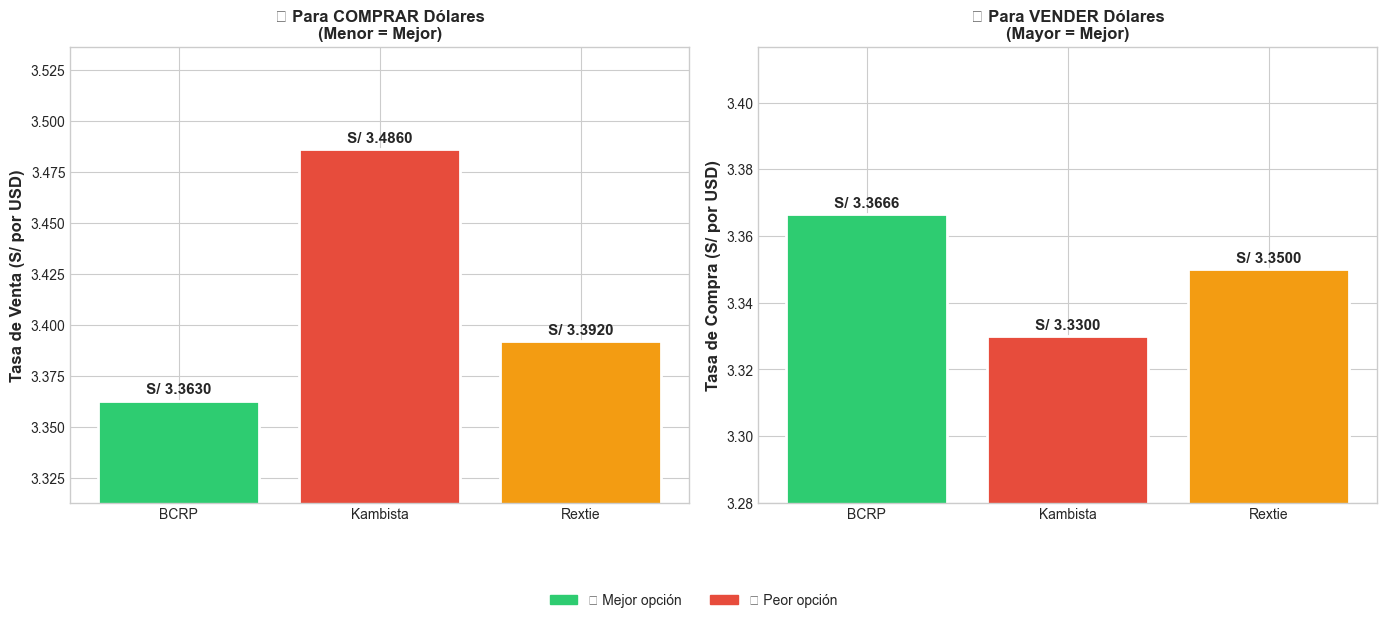

In [19]:
# =============================================================================
# GRÁFICO 3: MEJOR OPCIÓN VISUAL
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Gráfico izquierdo: Para COMPRAR USD ---
ax1 = axes[0]
fuentes_v = list(tasas_venta.keys())
valores_v = list(tasas_venta.values())

# Colores (verde para mejor, rojo para peor)
colores_v = ['#2ECC71' if v == min(valores_v) else '#E74C3C' if v == max(valores_v) else '#F39C12' 
             for v in valores_v]

bars1 = ax1.bar(fuentes_v, valores_v, color=colores_v, edgecolor='white', linewidth=2)
ax1.set_title('📥 Para COMPRAR Dólares\n(Menor = Mejor)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Tasa de Venta (S/ por USD)', fontweight='bold')
ax1.set_ylim(min(valores_v) - 0.05, max(valores_v) + 0.05)

for bar, valor in zip(bars1, valores_v):
    ax1.annotate(f'S/ {valor:.4f}', 
                 xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(0, 5), textcoords="offset points",
                 ha='center', fontsize=11, fontweight='bold')

# --- Gráfico derecho: Para VENDER USD ---
ax2 = axes[1]
fuentes_c = list(tasas_compra.keys())
valores_c = list(tasas_compra.values())

# Colores (verde para mejor, rojo para peor)
colores_c = ['#2ECC71' if v == max(valores_c) else '#E74C3C' if v == min(valores_c) else '#F39C12' 
             for v in valores_c]

bars2 = ax2.bar(fuentes_c, valores_c, color=colores_c, edgecolor='white', linewidth=2)
ax2.set_title('📤 Para VENDER Dólares\n(Mayor = Mejor)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Tasa de Compra (S/ por USD)', fontweight='bold')
ax2.set_ylim(min(valores_c) - 0.05, max(valores_c) + 0.05)

for bar, valor in zip(bars2, valores_c):
    ax2.annotate(f'S/ {valor:.4f}', 
                 xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(0, 5), textcoords="offset points",
                 ha='center', fontsize=11, fontweight='bold')

# Leyenda común
legend_elements = [
    mpatches.Patch(color='#2ECC71', label='✅ Mejor opción'),
    mpatches.Patch(color='#E74C3C', label='❌ Peor opción')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.02))

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

---

## 7. Cálculo de Ahorro Potencial

¿Cuánto dinero se puede ahorrar eligiendo la mejor fuente?

In [20]:
# =============================================================================
# CALCULADORA DE AHORRO
# =============================================================================

def calcular_ahorro(monto_usd, tasas_venta, tasas_compra):
    """
    Calcula el ahorro potencial al elegir la mejor fuente.
    
    Args:
        monto_usd: Monto en dólares a cambiar
        tasas_venta: Dict con tasas de venta por fuente
        tasas_compra: Dict con tasas de compra por fuente
    
    Returns:
        Dict con el análisis de ahorro
    """
    # Para COMPRAR USD
    mejor_venta = min(tasas_venta.values())
    peor_venta = max(tasas_venta.values())
    costo_mejor = monto_usd * mejor_venta
    costo_peor = monto_usd * peor_venta
    ahorro_compra = costo_peor - costo_mejor
    
    # Para VENDER USD
    mejor_compra = max(tasas_compra.values())
    peor_compra = min(tasas_compra.values())
    ingreso_mejor = monto_usd * mejor_compra
    ingreso_peor = monto_usd * peor_compra
    ahorro_venta = ingreso_mejor - ingreso_peor
    
    return {
        'monto_usd': monto_usd,
        'ahorro_comprando': ahorro_compra,
        'ahorro_vendiendo': ahorro_venta,
        'costo_mejor': costo_mejor,
        'costo_peor': costo_peor,
        'ingreso_mejor': ingreso_mejor,
        'ingreso_peor': ingreso_peor
    }

# Calcular para diferentes montos
montos = [100, 500, 1000, 5000, 10000]

print("\n" + "="*70)
print("   💰 CALCULADORA DE AHORRO POTENCIAL")
print("="*70)
print("\n   Comparando la MEJOR vs PEOR opción de cambio:")
print("\n   " + "-"*65)
print(f"   {'Monto (USD)':<12} | {'Ahorro Comprando':<18} | {'Ahorro Vendiendo':<18}")
print("   " + "-"*65)

for monto in montos:
    resultado = calcular_ahorro(monto, tasas_venta, tasas_compra)
    print(f"   ${monto:>10,}   |   S/ {resultado['ahorro_comprando']:>12,.2f}   |   S/ {resultado['ahorro_vendiendo']:>12,.2f}")

print("   " + "-"*65)
print("\n   💡 El ahorro aumenta proporcionalmente con el monto cambiado.")


   💰 CALCULADORA DE AHORRO POTENCIAL

   Comparando la MEJOR vs PEOR opción de cambio:

   -----------------------------------------------------------------
   Monto (USD)  | Ahorro Comprando   | Ahorro Vendiendo  
   -----------------------------------------------------------------
   $       100   |   S/        12.30   |   S/         3.66
   $       500   |   S/        61.50   |   S/        18.30
   $     1,000   |   S/       123.00   |   S/        36.60
   $     5,000   |   S/       615.00   |   S/       183.00
   $    10,000   |   S/     1,230.00   |   S/       366.00
   -----------------------------------------------------------------

   💡 El ahorro aumenta proporcionalmente con el monto cambiado.


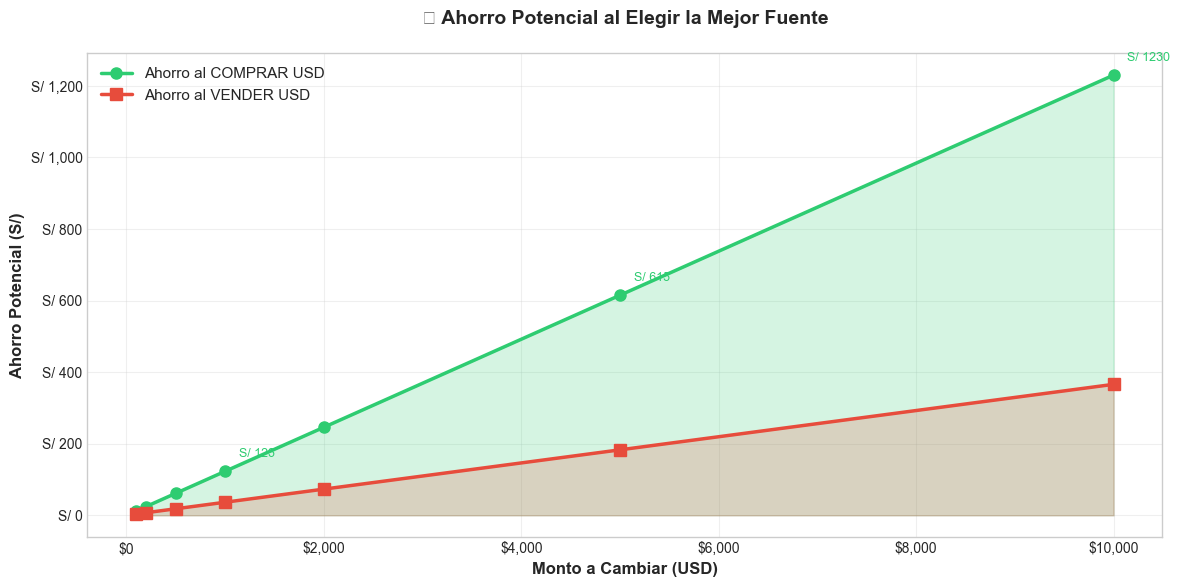


💡 CONCLUSIÓN: Elegir la fuente correcta puede generar ahorros significativos,
   especialmente en montos grandes.


In [21]:
# =============================================================================
# GRÁFICO 4: AHORRO POTENCIAL
# =============================================================================

fig, ax = plt.subplots(figsize=(12, 6))

# Calcular ahorros para diferentes montos
montos_grafico = [100, 200, 500, 1000, 2000, 5000, 10000]
ahorros_compra = []
ahorros_venta = []

for monto in montos_grafico:
    resultado = calcular_ahorro(monto, tasas_venta, tasas_compra)
    ahorros_compra.append(resultado['ahorro_comprando'])
    ahorros_venta.append(resultado['ahorro_vendiendo'])

# Crear gráfico de líneas
ax.plot(montos_grafico, ahorros_compra, 'o-', color=COLORES['compra'], 
        linewidth=2.5, markersize=8, label='Ahorro al COMPRAR USD')
ax.plot(montos_grafico, ahorros_venta, 's-', color=COLORES['venta'], 
        linewidth=2.5, markersize=8, label='Ahorro al VENDER USD')

# Sombrear área bajo la curva
ax.fill_between(montos_grafico, ahorros_compra, alpha=0.2, color=COLORES['compra'])
ax.fill_between(montos_grafico, ahorros_venta, alpha=0.2, color=COLORES['venta'])

# Configuración
ax.set_xlabel('Monto a Cambiar (USD)', fontweight='bold')
ax.set_ylabel('Ahorro Potencial (S/)', fontweight='bold')
ax.set_title('📈 Ahorro Potencial al Elegir la Mejor Fuente\n', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)

# Formato de ejes
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'S/ {x:,.0f}'))

# Anotaciones para puntos específicos
for i, monto in enumerate(montos_grafico):
    if monto in [1000, 5000, 10000]:
        ax.annotate(f'S/ {ahorros_compra[i]:.0f}', 
                    xy=(monto, ahorros_compra[i]),
                    xytext=(10, 10), textcoords='offset points',
                    fontsize=9, color=COLORES['compra'])

plt.tight_layout()
plt.show()

print("\n💡 CONCLUSIÓN: Elegir la fuente correcta puede generar ahorros significativos,")
print("   especialmente en montos grandes.")

---

## 8. Resumen Ejecutivo

Dashboard final con todas las métricas clave.

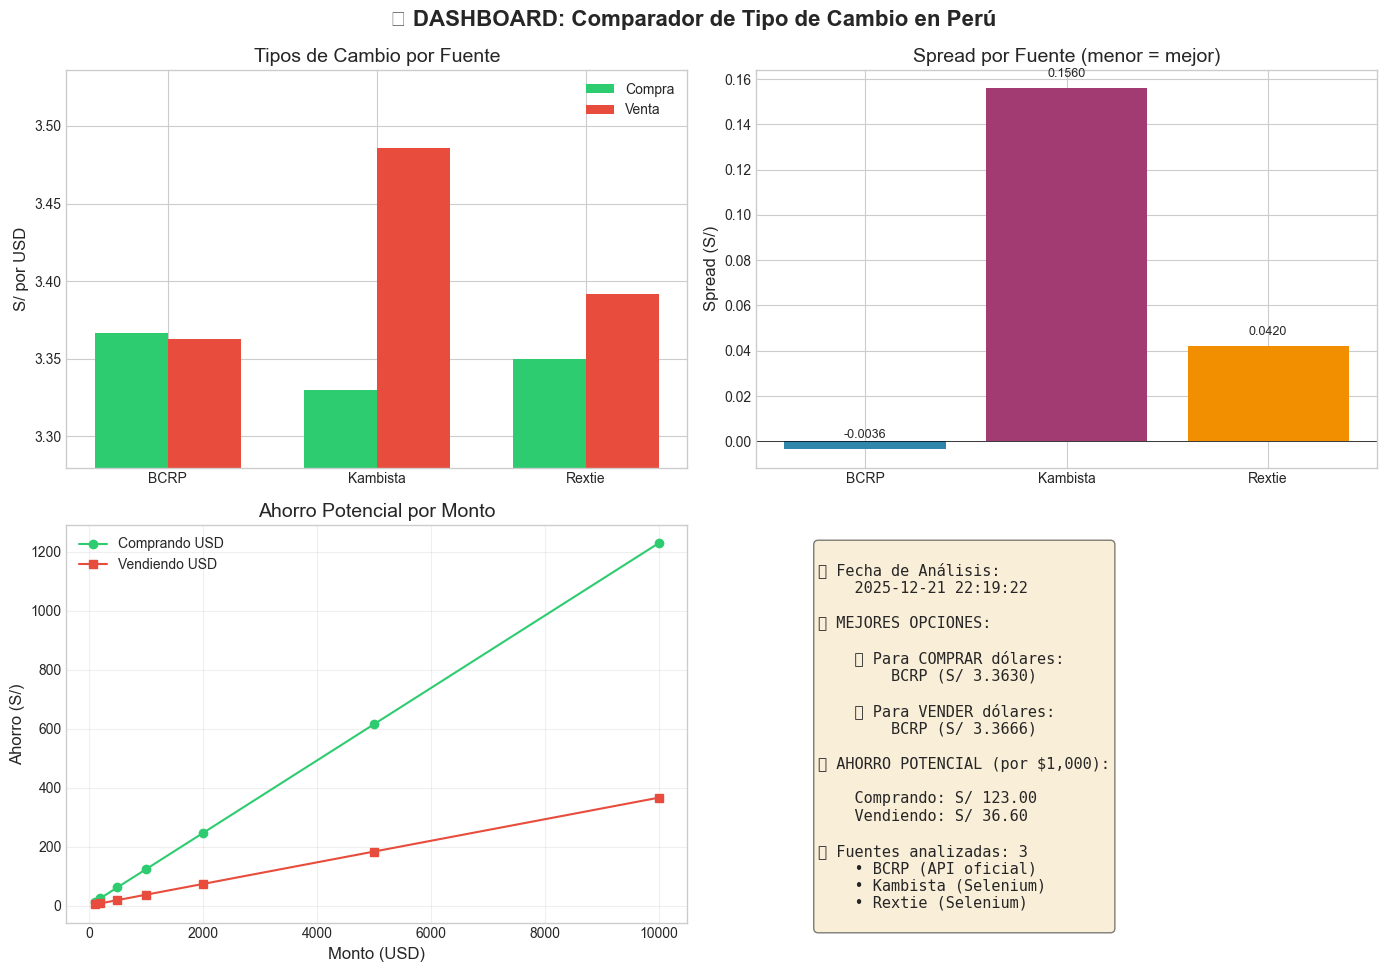

In [22]:
# =============================================================================
# GRÁFICO 5: DASHBOARD RESUMEN
# =============================================================================

fig = plt.figure(figsize=(14, 10))

# Título principal
fig.suptitle('📊 DASHBOARD: Comparador de Tipo de Cambio en Perú', 
             fontsize=16, fontweight='bold', y=0.98)

# --- Subplot 1: Tipos de cambio ---
ax1 = fig.add_subplot(2, 2, 1)
x = np.arange(len(fuentes))
width = 0.35
ax1.bar(x - width/2, compra, width, label='Compra', color=COLORES['compra'])
ax1.bar(x + width/2, venta, width, label='Venta', color=COLORES['venta'])
ax1.set_ylabel('S/ por USD')
ax1.set_title('Tipos de Cambio por Fuente')
ax1.set_xticks(x)
ax1.set_xticklabels(fuentes)
ax1.legend()
ax1.set_ylim(min(compra + venta) - 0.05, max(compra + venta) + 0.05)

# --- Subplot 2: Spreads ---
ax2 = fig.add_subplot(2, 2, 2)
colores_s = [COLORES['bcrp'], COLORES['kambista'], COLORES['rextie']]
ax2.bar(fuentes_spread, valores_spread, color=colores_s)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.set_ylabel('Spread (S/)')
ax2.set_title('Spread por Fuente (menor = mejor)')
for i, v in enumerate(valores_spread):
    ax2.text(i, v + 0.005, f'{v:.4f}', ha='center', fontsize=9)

# --- Subplot 3: Ahorro potencial ---
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(montos_grafico, ahorros_compra, 'o-', color=COLORES['compra'], label='Comprando USD')
ax3.plot(montos_grafico, ahorros_venta, 's-', color=COLORES['venta'], label='Vendiendo USD')
ax3.set_xlabel('Monto (USD)')
ax3.set_ylabel('Ahorro (S/)')
ax3.set_title('Ahorro Potencial por Monto')
ax3.legend()
ax3.grid(True, alpha=0.3)

# --- Subplot 4: Resumen de texto ---
ax4 = fig.add_subplot(2, 2, 4)
ax4.axis('off')

resumen_texto = f"""
📅 Fecha de Análisis:
    {ultimo['timestamp']}

🏆 MEJORES OPCIONES:

    📥 Para COMPRAR dólares:
        {mejor_para_comprar[0]} (S/ {mejor_para_comprar[1]:.4f})

    📤 Para VENDER dólares:
        {mejor_para_vender[0]} (S/ {mejor_para_vender[1]:.4f})

💰 AHORRO POTENCIAL (por $1,000):

    Comprando: S/ {calcular_ahorro(1000, tasas_venta, tasas_compra)['ahorro_comprando']:.2f}
    Vendiendo: S/ {calcular_ahorro(1000, tasas_venta, tasas_compra)['ahorro_vendiendo']:.2f}

📊 Fuentes analizadas: 3
    • BCRP (API oficial)
    • Kambista (Selenium)
    • Rextie (Selenium)
"""

ax4.text(0.1, 0.95, resumen_texto, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

---

## 9. Conclusiones y Recomendaciones

In [23]:
# =============================================================================
# CONCLUSIONES FINALES
# =============================================================================

print("\n" + "="*70)
print("   📋 CONCLUSIONES DEL ANÁLISIS")
print("="*70)

print("\n   1️⃣  SOBRE LAS FUENTES DE DATOS:")
print("       • Se extrajeron datos exitosamente de 3 fuentes diferentes")
print("       • BCRP: API oficial del Banco Central (más confiable)")
print("       • Kambista y Rextie: Web scraping con Selenium")

print("\n   2️⃣  SOBRE LOS TIPOS DE CAMBIO:")
print(f"       • El rango de tasas de COMPRA va de S/ {min(tasas_compra.values()):.4f} a S/ {max(tasas_compra.values()):.4f}")
print(f"       • El rango de tasas de VENTA va de S/ {min(tasas_venta.values()):.4f} a S/ {max(tasas_venta.values()):.4f}")

print("\n   3️⃣  SOBRE LOS SPREADS:")
print(f"       • Menor spread: {mejor_spread[0]} (S/ {mejor_spread[1]:.4f})")
print(f"       • Mayor spread: {peor_spread[0]} (S/ {peor_spread[1]:.4f})")
if spread_bcrp < 0:
    print("       • Nota: BCRP tiene spread negativo (valores de referencia)")

print("\n   4️⃣  RECOMENDACIONES PARA EL USUARIO:")
print(f"       • Para COMPRAR dólares → Usar {mejor_para_comprar[0]}")
print(f"       • Para VENDER dólares → Usar {mejor_para_vender[0]}")
print(f"       • Ahorro potencial por $1,000: hasta S/ {max(calcular_ahorro(1000, tasas_venta, tasas_compra)['ahorro_comprando'], calcular_ahorro(1000, tasas_venta, tasas_compra)['ahorro_vendiendo']):.2f}")

print("\n   5️⃣  VALOR DEL PROYECTO:")
print("       • Automatiza la comparación de tipos de cambio")
print("       • Permite tomar decisiones informadas")
print("       • Genera ahorro real para los usuarios")
print("       • Promueve la transparencia en el mercado cambiario")

print("\n" + "="*70)
print("   Análisis realizado por: Equipo LP2 - UNALM 2025-2")
print("   Javier Uraco | Fiorella Fuentes | Sebastián Fernández")
print("="*70)


   📋 CONCLUSIONES DEL ANÁLISIS

   1️⃣  SOBRE LAS FUENTES DE DATOS:
       • Se extrajeron datos exitosamente de 3 fuentes diferentes
       • BCRP: API oficial del Banco Central (más confiable)
       • Kambista y Rextie: Web scraping con Selenium

   2️⃣  SOBRE LOS TIPOS DE CAMBIO:
       • El rango de tasas de COMPRA va de S/ 3.3300 a S/ 3.3666
       • El rango de tasas de VENTA va de S/ 3.3630 a S/ 3.4860

   3️⃣  SOBRE LOS SPREADS:
       • Menor spread: Rextie (S/ 0.0420)
       • Mayor spread: Kambista (S/ 0.1560)
       • Nota: BCRP tiene spread negativo (valores de referencia)

   4️⃣  RECOMENDACIONES PARA EL USUARIO:
       • Para COMPRAR dólares → Usar BCRP
       • Para VENDER dólares → Usar BCRP
       • Ahorro potencial por $1,000: hasta S/ 123.00

   5️⃣  VALOR DEL PROYECTO:
       • Automatiza la comparación de tipos de cambio
       • Permite tomar decisiones informadas
       • Genera ahorro real para los usuarios
       • Promueve la transparencia en el mercado cam

---

## 📚 Referencias Técnicas

### Fuentes de Datos
- **BCRP API:** https://estadisticas.bcrp.gob.pe/estadisticas/series/api/
- **Kambista:** https://kambista.com
- **Rextie:** https://rextie.com

### Tecnologías Utilizadas
- **Python 3.10+**
- **Pandas** - Manipulación de datos
- **Matplotlib** - Visualización
- **Selenium** - Web scraping de páginas dinámicas
- **Requests** - Consumo de API

### Repositorio
- **GitHub:** https://github.com/JavierAnthonyUS/tipo-cambio-peru

---